## IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [80]:
# Loading dataset
ds = pd.read_csv('train_agriculture.csv')

In [81]:
# Loading top 5 rows and all columns
ds.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [82]:
# Checking shape of dataset
ds.shape

(88858, 10)

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


In [6]:
ds.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

Column Number_Weeks_Used contains 9000 missing/NaN values. We need to replace these values with appropiate data

In [83]:
# Unique Values in dataset
ds['Number_Weeks_Used'].unique()

array([ 0., nan, 26., 20., 15., 14., 19., 24.,  8., 23., 25., 28., 29.,
       22., 21., 17., 30., 35., 32., 27., 16., 31., 33., 34., 39., 38.,
       42., 40., 41., 36., 44., 37., 46., 45., 47., 43., 50., 10., 49.,
       53., 48., 51., 54., 52., 55., 56., 61., 18., 57., 62., 60., 63.,
       66., 59., 64., 13.,  7.,  5., 12.,  6.,  9., 58., 11., 65., 67.])

In [84]:
# Summary Statistics of coulumn - Number_Weeks_Used 
ds['Number_Weeks_Used'].describe()

count    79858.000000
mean        28.623970
std         12.391881
min          0.000000
25%         20.000000
50%         28.000000
75%         37.000000
max         67.000000
Name: Number_Weeks_Used, dtype: float64

In [85]:
# Filling NaN values with mean of column
ds['Number_Weeks_Used'] = ds['Number_Weeks_Used'].fillna(ds['Number_Weeks_Used'].mean())

In [86]:
# Rececking if there is any other NaN values
ds.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

No more null values in dataset

## STATISTICAL DESCRIPTION

In [88]:
# Summary Statistics of Dataset
ds.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,11.747567,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.623970,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


In [89]:
# Mean, Standard Deviation, Median, Min and Maximum Values in dataset
i = ds[['Estimated_Insects_Count','Crop_Type','Soil_Type','Pesticide_Use_Category','Number_Doses_Week','Number_Weeks_Used'
        ,'Number_Weeks_Quit','Season','Crop_Damage']]

for i in i:
    print('Mean of column',i,'=',ds[i].mean())
    print('Standard Deviation of column',i,'=',ds[i].std())
    print('Median of column',i,'=',ds[i].median())
    print('Min of column',i,'=',ds[i].min())
    print('Max of column',i,'=',ds[i].max())
    print('\n')
    print('------------------------------------------------------------------------------------------------------------------')

Mean of column Estimated_Insects_Count = 1399.0122104931463
Standard Deviation of column Estimated_Insects_Count = 849.0487806670102
Median of column Estimated_Insects_Count = 1212.0
Min of column Estimated_Insects_Count = 150
Max of column Estimated_Insects_Count = 4097


------------------------------------------------------------------------------------------------------------------
Mean of column Crop_Type = 0.2843750703369421
Standard Deviation of column Crop_Type = 0.4511188091517885
Median of column Crop_Type = 0.0
Min of column Crop_Type = 0
Max of column Crop_Type = 1


------------------------------------------------------------------------------------------------------------------
Mean of column Soil_Type = 0.4584167998379437
Standard Deviation of column Soil_Type = 0.4982706408302739
Median of column Soil_Type = 0.0
Min of column Soil_Type = 0
Max of column Soil_Type = 1


------------------------------------------------------------------------------------------------------

In [90]:
# Unique Values in all columns

i = ds[['Estimated_Insects_Count','Crop_Type','Soil_Type','Pesticide_Use_Category','Number_Doses_Week','Number_Weeks_Used'
        ,'Number_Weeks_Quit','Season','Crop_Damage']]

for i in i:
    print('Unique values in column',i,'=',ds[i].unique())
    print('\n')
    print('------------------------------------------------------------------------------------------------------------------')

Unique values in column Estimated_Insects_Count = [ 188  209  257  342  448  577  731 1132 1212 1575 1785 2138 2401 2999
 3516 3895 4096  150  151  168  232  231  256  283  312  311  375  411
  410  488  489  531  626  625  677  732  789  790  851  850  915  916
  984 1056 1296 1297 1385 1478 1576 1678 1786 1898 2015 2016 2139 2267
 2402 2542 2541 2688 2687 2840 3164 3165 3336 3337 3702 3896  169 3515
 4097]


------------------------------------------------------------------------------------------------------------------
Unique values in column Crop_Type = [1 0]


------------------------------------------------------------------------------------------------------------------
Unique values in column Soil_Type = [0 1]


------------------------------------------------------------------------------------------------------------------
Unique values in column Pesticide_Use_Category = [1 3 2]


----------------------------------------------------------------------------------------------

In [91]:
# Checking unique values sum in all column
for i in ds.columns:
    j= ds[i].nunique()
    print('Unique values in column',i,'=',j)

Unique values in column ID = 88858
Unique values in column Estimated_Insects_Count = 71
Unique values in column Crop_Type = 2
Unique values in column Soil_Type = 2
Unique values in column Pesticide_Use_Category = 3
Unique values in column Number_Doses_Week = 20
Unique values in column Number_Weeks_Used = 65
Unique values in column Number_Weeks_Quit = 51
Unique values in column Season = 3
Unique values in column Crop_Damage = 3


# UNIVARIATE ANALYSIS

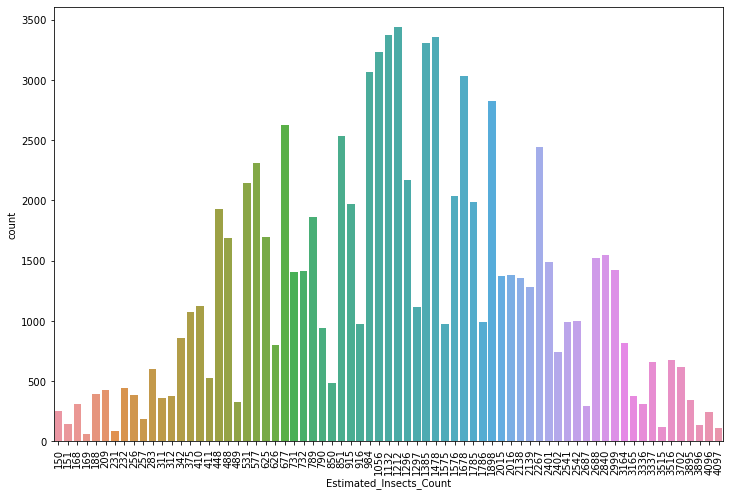

1212    3438
1132    3370
1478    3358
1385    3309
1056    3235
        ... 
3896     134
3515     123
4097     113
231       89
169       63
Name: Estimated_Insects_Count, Length: 71, dtype: int64


In [15]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.countplot('Estimated_Insects_Count', data = ds)
plt.show()

print(ds['Estimated_Insects_Count'].value_counts())

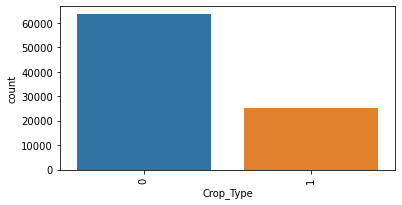

0    63589
1    25269
Name: Crop_Type, dtype: int64


In [16]:
plt.figure(figsize=(6,3))
plt.xticks(rotation=90)
sns.countplot('Crop_Type', data = ds)
plt.show()

print(ds['Crop_Type'].value_counts())

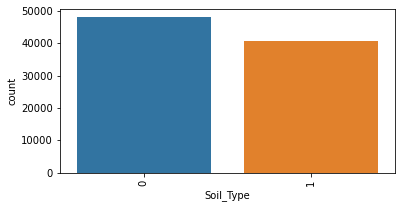

0    48124
1    40734
Name: Soil_Type, dtype: int64


In [17]:
plt.figure(figsize=(6,3))
plt.xticks(rotation=90)
sns.countplot('Soil_Type', data = ds)
plt.show()

print(ds['Soil_Type'].value_counts())

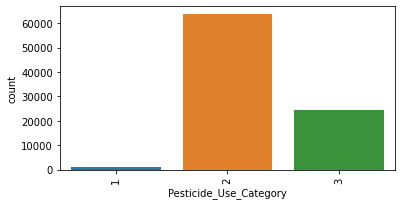

2    63709
3    24312
1      837
Name: Pesticide_Use_Category, dtype: int64


In [18]:
plt.figure(figsize=(6,3))
plt.xticks(rotation=90)
sns.countplot('Pesticide_Use_Category', data = ds)
plt.show()

print(ds['Pesticide_Use_Category'].value_counts())

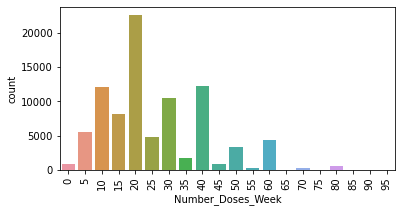

20    22589
40    12298
10    12111
30    10438
15     8178
5      5520
25     4890
60     4367
50     3361
35     1832
45      936
0       837
80      672
70      303
55      277
90       83
65       64
75       61
95       30
85       11
Name: Number_Doses_Week, dtype: int64


In [19]:
plt.figure(figsize=(6,3))
plt.xticks(rotation=90)
sns.countplot('Number_Doses_Week', data = ds)
plt.show()

print(ds['Number_Doses_Week'].value_counts())

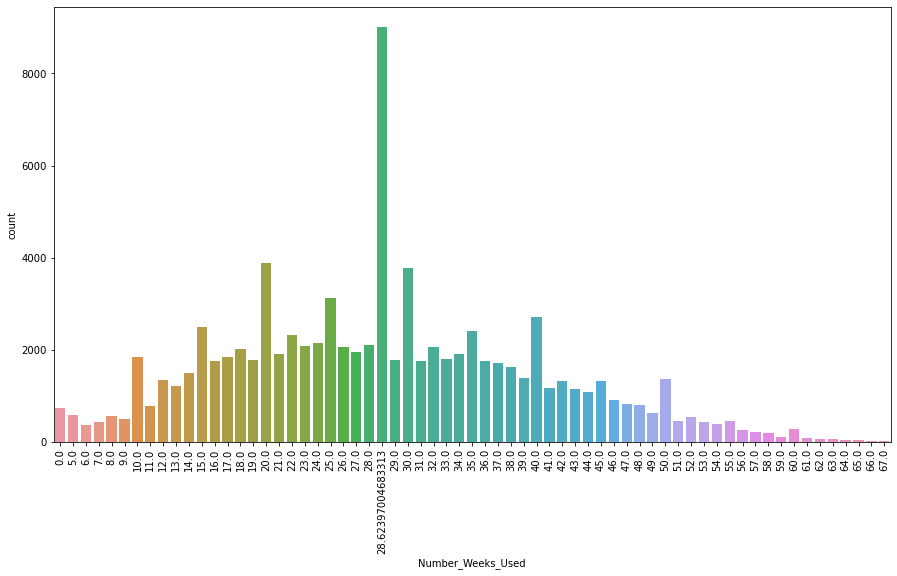

28.62397    9000
20.00000    3878
30.00000    3765
25.00000    3120
40.00000    2707
            ... 
63.00000      50
64.00000      44
65.00000      31
66.00000      17
67.00000       8
Name: Number_Weeks_Used, Length: 65, dtype: int64


In [20]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.countplot('Number_Weeks_Used', data = ds)
plt.show()

print(ds['Number_Weeks_Used'].value_counts())

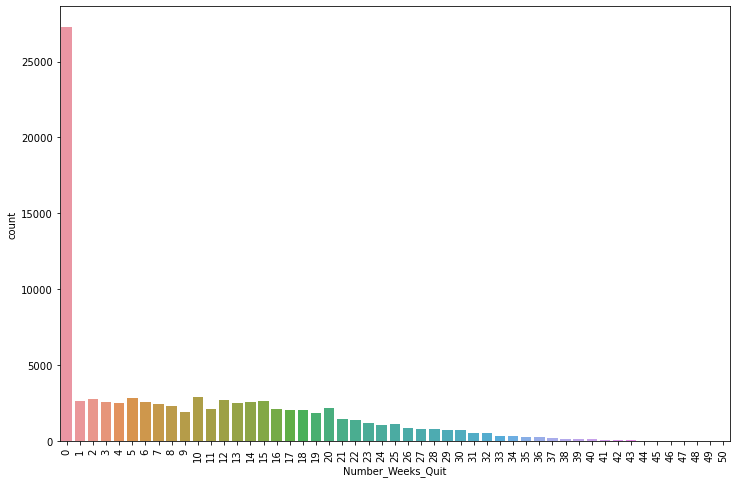

In [21]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.countplot('Number_Weeks_Quit', data = ds)
plt.show()

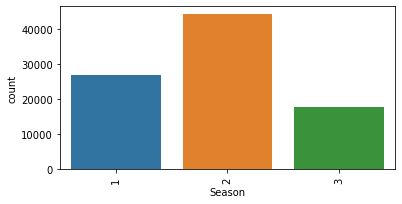

2    44210
1    26902
3    17746
Name: Season, dtype: int64


In [22]:
plt.figure(figsize=(6,3))
plt.xticks(rotation=90)
sns.countplot('Season', data = ds)
plt.show()

print(ds['Season'].value_counts())

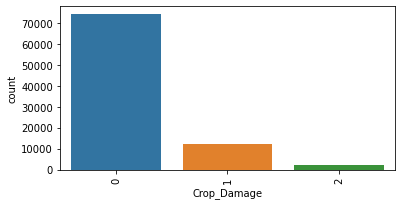

0    74238
1    12307
2     2313
Name: Crop_Damage, dtype: int64


In [23]:
plt.figure(figsize=(6,3))
plt.xticks(rotation=90)
sns.countplot('Crop_Damage', data = ds)
plt.show()


print(ds['Crop_Damage'].value_counts())

# BIVARIATE ANALYSIS

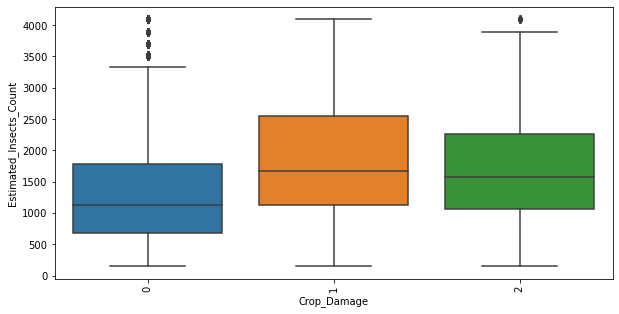

In [24]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.boxplot(x= ds['Crop_Damage'],y =ds['Estimated_Insects_Count'])
plt.show()

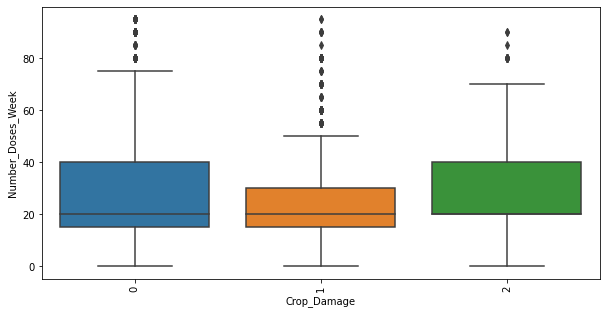

In [25]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.boxplot(x= ds['Crop_Damage'],y =ds['Number_Doses_Week'])
plt.show()

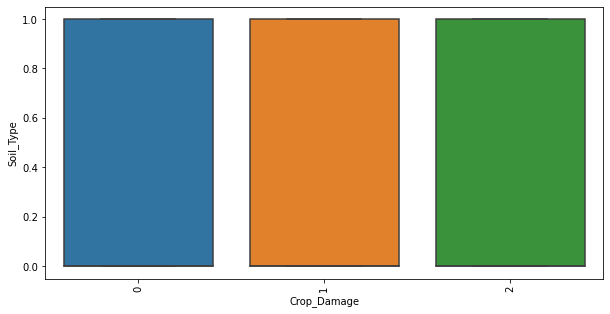

In [26]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.boxplot(x= ds['Crop_Damage'],y =ds['Soil_Type'])
plt.show()

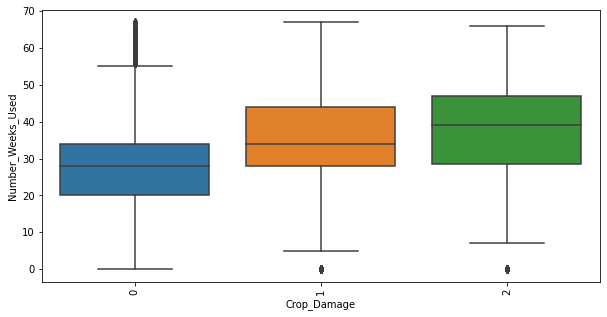

In [27]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.boxplot(x= ds['Crop_Damage'],y =ds['Number_Weeks_Used'])
plt.show()

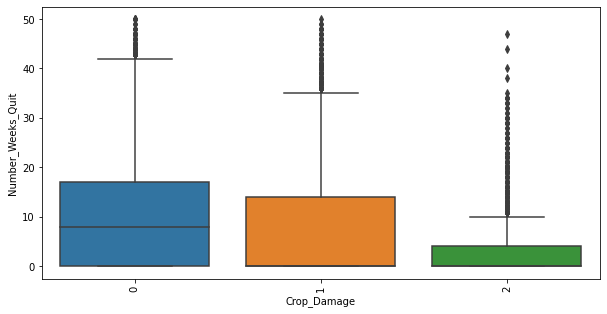

In [28]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.boxplot(x= ds['Crop_Damage'],y =ds['Number_Weeks_Quit'])
plt.show()

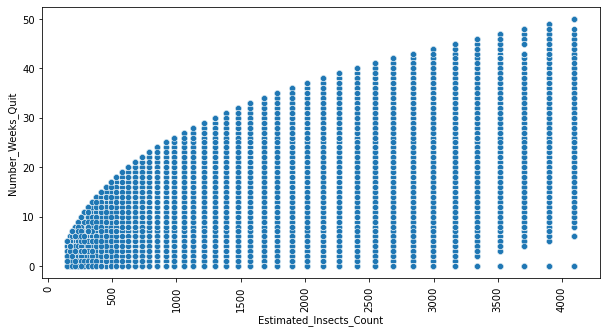

In [29]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.scatterplot(x= ds['Estimated_Insects_Count'],y =ds['Number_Weeks_Quit'])
plt.show()

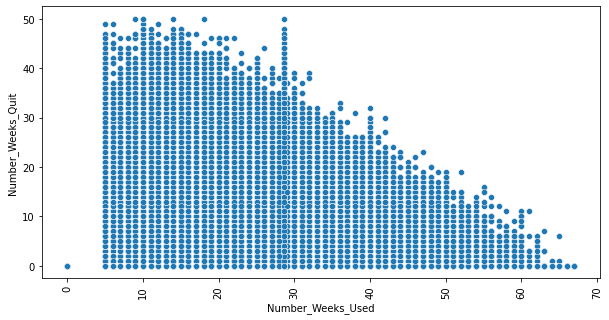

In [30]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.scatterplot(x= ds['Number_Weeks_Used'],y =ds['Number_Weeks_Quit'])
plt.show()

# CORRELATION HEATMAP

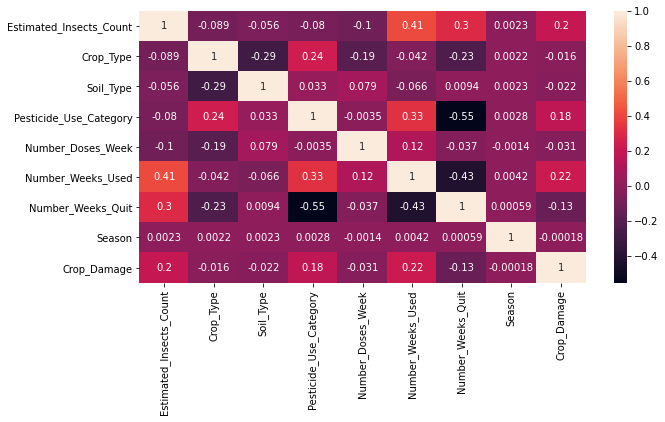

In [31]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.heatmap(ds.corr(),annot=True)
plt.show()

Observations:
    
    1) Column Estimated Insects Count, Number Weeks Used, Pestiside Use Category are highly correlated with target(Crop Damage)
    2) Other columns are -vely correlated with target.

# CHECKING OUTLIERS

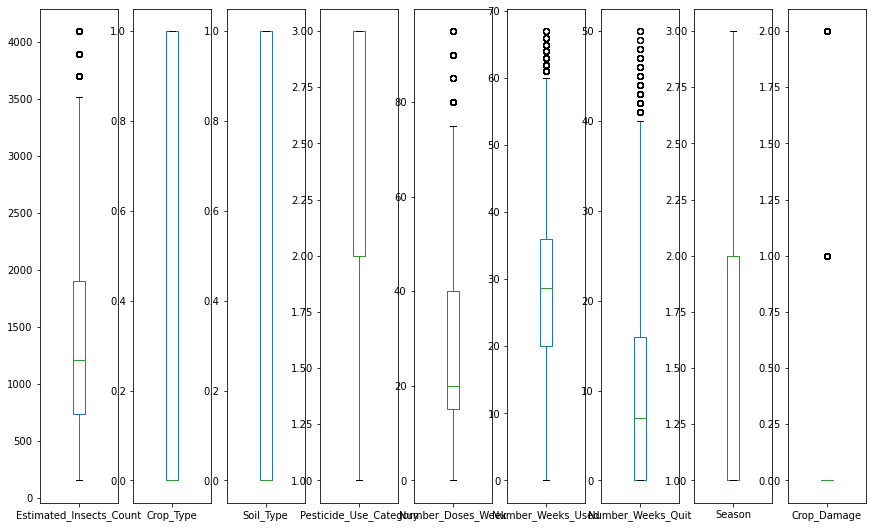

In [32]:
ds.plot(kind='box',subplots=True,layout=(2,30),figsize=(50,20))
plt.show()

Observations:
    
    Column Estimated Insects Count,Number Doses week, Number weeks used,number weeks quit, crop damage contains outliers.

In [33]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        88858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


In [92]:
# Dropping un-necessary columns
ds =  ds.drop('ID',axis = 1)

## REMOVING OUTLIERS

In [35]:
from scipy.stats import zscore
z=np.abs(zscore(ds))
z

array([[1.42632444, 1.58634254, 0.92002085, ..., 0.96862918, 1.27896183,
        0.41954474],
       [1.40159074, 1.58634254, 0.92002085, ..., 0.96862918, 0.14692448,
        1.78206788],
       [1.34505657, 1.58634254, 0.92002085, ..., 0.96862918, 0.14692448,
        1.78206788],
       ...,
       [2.49337818, 1.58634254, 0.92002085, ..., 0.16059534, 0.14692448,
        0.41954474],
       [2.7124481 , 1.58634254, 0.92002085, ..., 0.84944697, 1.57281078,
        0.41954474],
       [2.93976258, 1.58634254, 0.92002085, ..., 0.26159957, 1.57281078,
        0.41954474]])

In [36]:
threshold=3
print(np.where(z>3))

(array([    7,     9,    14, ..., 88741, 88770, 88853], dtype=int64), array([8, 8, 8, ..., 8, 4, 6], dtype=int64))


In [37]:
ds_new=ds[(z<3).all(axis=1)]

In [38]:
ds_new

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...
88852,3165,1,0,2,60,44.0,15,2,0
88854,3516,1,0,2,10,20.0,38,1,0
88855,3516,1,0,2,15,40.0,8,2,0
88856,3702,1,0,2,10,25.0,18,3,0


In [39]:
ds.shape

(88858, 9)

In [40]:
ds_new.shape

(84853, 9)

### Percentage loss of data after removal of  data is ~ 4.5% which is ok

In [41]:
ds_new.skew()

Estimated_Insects_Count    0.802312
Crop_Type                  0.939630
Soil_Type                  0.165963
Pesticide_Use_Category     0.857490
Number_Doses_Week          0.745649
Number_Weeks_Used          0.262547
Number_Weeks_Quit          0.792407
Season                     0.145248
Crop_Damage                2.065124
dtype: float64

As Crop damage skewness is =2 and all other are within range, so we will not use any method for removal of skewness

# DISTRIBUTION PLOT

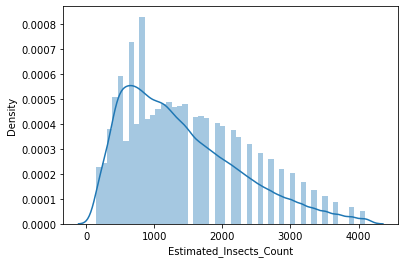

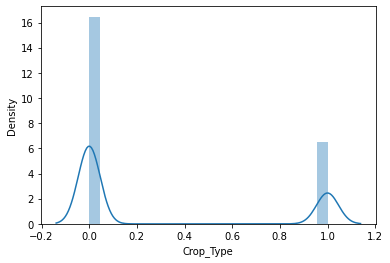

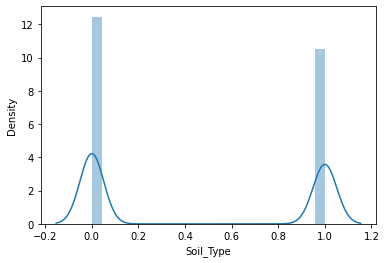

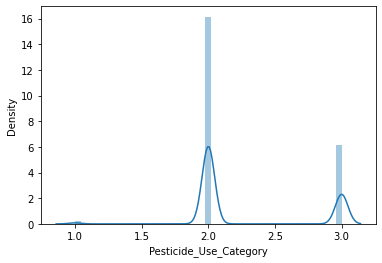

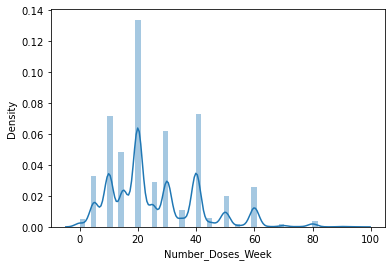

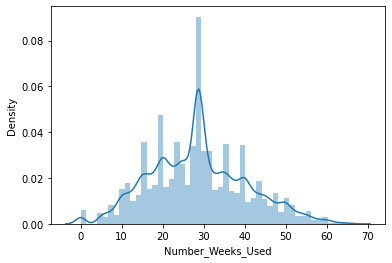

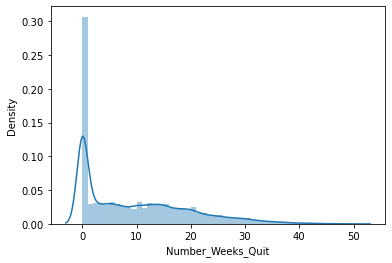

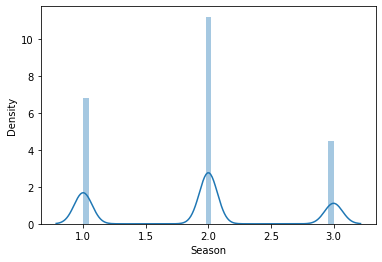

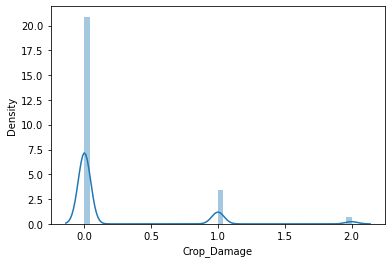

In [42]:
for i in ds.columns:
    sns.distplot(ds[i])
    plt.show()

# LOADING LIBRARIES FOR BUILDING MODEL

## AS OUR TARGET VARIABLE HAS 3 DIFFERENT ATTRIBUTES, SO WE WILL USE CLASSIFICATION METHOD.

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV,cross_val_score

In [44]:
x = ds_new.iloc[:,:8]

In [45]:
y = ds_new.iloc[:,-1]

In [46]:
sc=StandardScaler()

x=sc.fit_transform(x)

In [47]:
lr = LogisticRegression()
best_rstate=0
accu=0
for i in range(30,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    tempaccu=accuracy_score(y_test,y_pred)
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i

print(f"Best Accuracy {accu *100} found on random_state {best_rstate}")

Best Accuracy 86.32962111837841 found on random_state 170


In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=170)

In [49]:
# Loop for checking multiple alogrithms
model=[LogisticRegression(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),
       AdaBoostClassifier(),GradientBoostingClassifier()]

for i in model:
    i.fit(x_train,y_train)
    i.score(x_train,y_train)
    predi=i.predict(x_test)
    print('Accuracy Score of',i,'is')
    print(accuracy_score(y_test,predi))
    print(confusion_matrix(y_test,predi))
    print(classification_report(y_test,predi))
    print('\n')

Accuracy Score of LogisticRegression() is
0.8632962111837841
[[14544   143]
 [ 2177   107]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.93     14687
           1       0.43      0.05      0.08      2284

    accuracy                           0.86     16971
   macro avg       0.65      0.52      0.51     16971
weighted avg       0.81      0.86      0.81     16971



Accuracy Score of SVC() is
0.8719580460786047
[[14588    99]
 [ 2074   210]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     14687
           1       0.68      0.09      0.16      2284

    accuracy                           0.87     16971
   macro avg       0.78      0.54      0.55     16971
weighted avg       0.85      0.87      0.83     16971



Accuracy Score of DecisionTreeClassifier() is
0.7861646337870485
[[12685  2002]
 [ 1627   657]]
              precision    recall  f1-score   support

           0       0.8

Highest Accuracy = 87.19%- Support Vector Classifier

#### Loading Best Model

In [48]:
sv=SVC()
sv.fit(x_train,y_train)
predsv=sv.predict(x_test)
print(accuracy_score(y_test,predsv))
print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))

0.8719580460786047
[[14588    99]
 [ 2074   210]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     14687
           1       0.68      0.09      0.16      2284

    accuracy                           0.87     16971
   macro avg       0.78      0.54      0.55     16971
weighted avg       0.85      0.87      0.83     16971



## HYPERPARAMETER TUNING USING GRIDSEARCHCV

In [51]:
from sklearn.model_selection import GridSearchCV

In [ ]:
svc=SVC()

svcpara={ 
    "kernel" :['linear','poly','rbf'],
    'C':[1,10],
    'max_iter':[-1]}

svcgrid=GridSearchCV(svc,param_grid=svcpara,cv=10,n_jobs=-1)

svcgrid.fit(x_train,y_train)
svcgrid.best_score_

## CROSS VALIDATION SCORE

In [ ]:
svc=SVC()
sc=cross_val_score(svc,x,y,cv=3)
print('Cross Validation Score is = ',sc*100)
print('Mean is =',sc.mean()*100,'and Standard Deviation is =',sc.std())

## EXPORTING TRAINED MODEL

In [72]:
import pickle

In [73]:
finalmodel = 'Agriculture_train.pkl'
pickle.dump(sv, open(finalmodel, 'wb'))

# LOADING TEST DATASET

In [51]:
ds_test = pd.read_csv('test_agriculture.csv')

In [53]:
ds_test.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [55]:
ds_test.shape

(1199, 9)

In [56]:
ds_test.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

In [60]:
ds_test['Number_Weeks_Used'] = ds_test['Number_Weeks_Used'].fillna(ds_test['Number_Weeks_Used'].mean())

In [61]:
ds_test = ds_test.drop('ID',axis=1)

In [62]:
from scipy.stats import zscore
z=np.abs(zscore(ds_test))
z

array([[1.30318366e+00, 2.03615391e+00, 1.09360445e+00, ...,
        5.85986262e-16, 7.96003797e-01, 1.72804130e-01],
       [1.04035366e+00, 2.03615391e+00, 1.09360445e+00, ...,
        2.39438582e+00, 7.96003797e-01, 1.72804130e-01],
       [7.84627185e-01, 2.03615391e+00, 9.14407397e-01, ...,
        2.39438582e+00, 7.96003797e-01, 1.72804130e-01],
       ...,
       [1.85564227e-01, 4.91122009e-01, 1.09360445e+00, ...,
        1.32227276e+00, 1.79995135e+00, 1.28629553e+00],
       [9.08507165e-02, 4.91122009e-01, 1.09360445e+00, ...,
        4.92072401e-01, 2.31665722e-01, 1.28629553e+00],
       [9.08507165e-02, 4.91122009e-01, 1.09360445e+00, ...,
        5.85986262e-16, 1.46134850e+00, 1.63190379e+00]])

In [63]:
threshold=3
print(np.where(z>3))

(array([  50,   83,  129,  136,  179,  255,  280,  281,  282,  501,  502,
        503,  535,  574,  613,  630,  751,  775,  827,  829,  853,  868,
        870,  871,  883,  890,  895,  897,  902,  904,  910,  911,  912,
        913,  914,  915,  916, 1030, 1152], dtype=int64), array([4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 4, 4], dtype=int64))


In [66]:
ds_new1=ds_test[(z<3).all(axis=1)]

In [67]:
ds_new1

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188,1,1,1,0,29.033333,0,2
1,410,1,1,1,0,0.000000,0,2
2,626,1,0,1,0,0.000000,0,2
3,731,1,0,1,0,0.000000,0,2
4,789,0,0,1,0,0.000000,0,1
...,...,...,...,...,...,...,...,...
1194,1132,0,1,2,40,34.000000,7,3
1195,1132,0,1,2,40,25.000000,3,1
1196,1132,0,1,2,20,13.000000,23,1
1197,1212,0,1,2,10,35.000000,5,1


After removal of outliers ~3.25% data is lost which is ok.

In [68]:
sc=StandardScaler()

ds_test=sc.fit_transform(ds_test)

In [75]:
# Load the Model for testing on trained data
final_model= pickle.load(open('Agriculture_train.pkl', "rb"))

In [76]:
final_test = final_model.predict(ds_test)

In [77]:
final_test

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [78]:
frep = pd.DataFrame(final_test)

In [79]:
frep

,0
0,1
1,1
2,1
3,1
4,1
...,...
1194,0
1195,0
1196,0
1197,0
